# 钱币定位任务

本实验设计了一个钱币定位系统，其不仅能够检测出输入图像中各钱币的边缘，同时能给出各个钱币的圆心坐标与半径。

### Canny 算法实现
通过经典的 Canny 算法实现可调节的边缘检测。

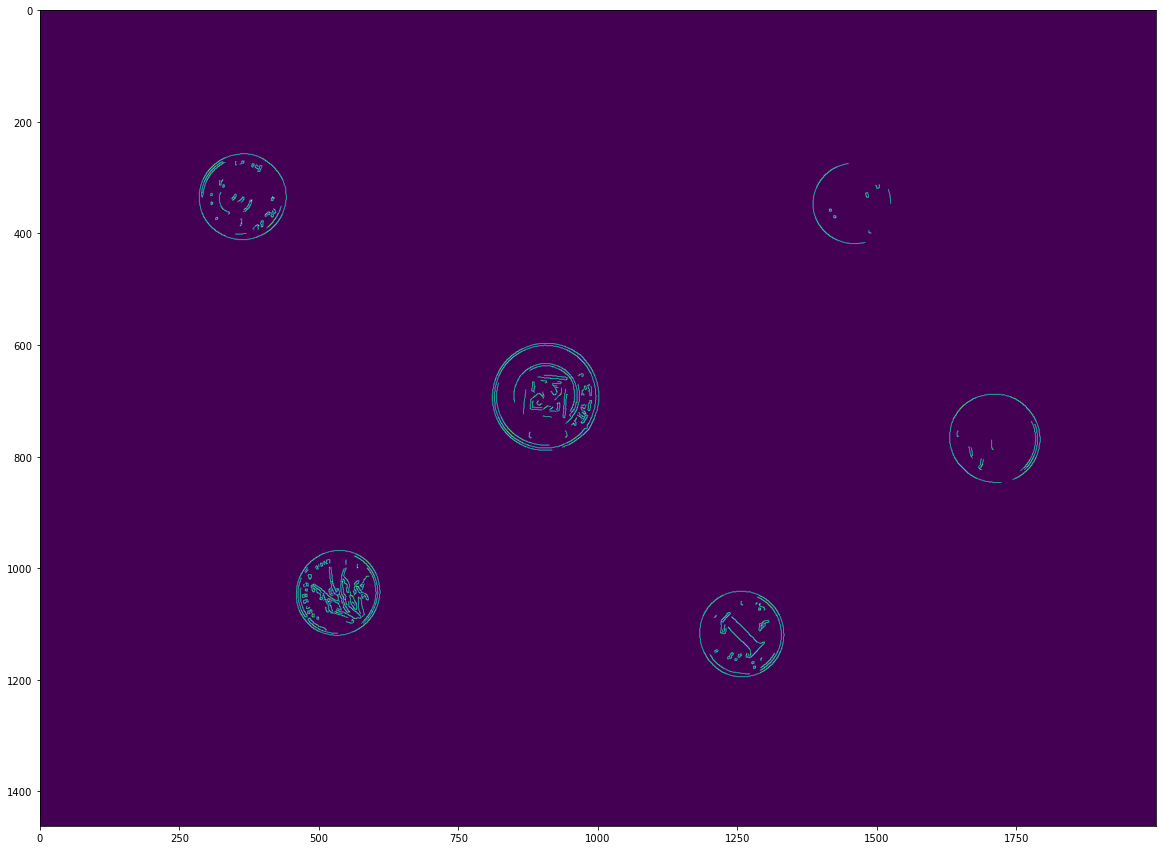

In [1]:
import canny
import utils

origin_img = utils.load_data('pic/pic.jpg')
img = utils.load_data('pic/pic.jpg', gray=True)

Canny = canny.CannyEdge(img, sigma=1, kernel_size=11, lowthreshold=0.2, highthreshold=0.35, weak_pixel=75)
Img = Canny.detect()

utils.visualize(Img)

### Hough 算法实现
基于 Canny 算法进一步检测出圆形形状，并确定圆心和半径。如果不能很好的实现 Canny 算法，可调用 opencv 库的已有 api 实现。

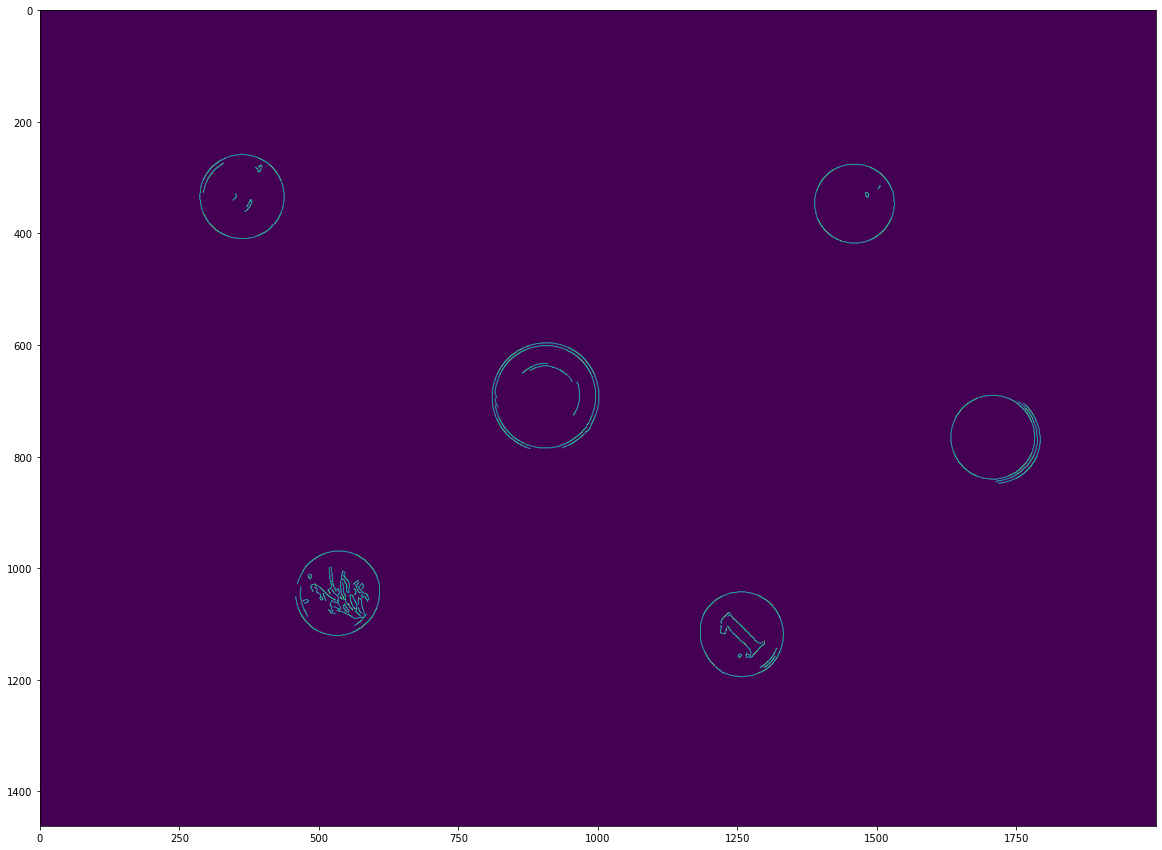

In [10]:
import cv2

gray_image = cv2.cvtColor(origin_img, cv2.COLOR_BGR2GRAY)
blur_image = cv2.GaussianBlur(gray_image, (9, 9), 0)
Img = cv2.Canny(blur_image, 75, 150)
utils.visualize(Img)

In [27]:
import hough

Hough = hough.HoughCricle(Img, origin_img, rad=100, filter_size=75, min_rad=25, max_rad=95)
res, plist, rlist = Hough.detect()

100%|██████████| 19/19 [00:03<00:00,  4.78it/s]


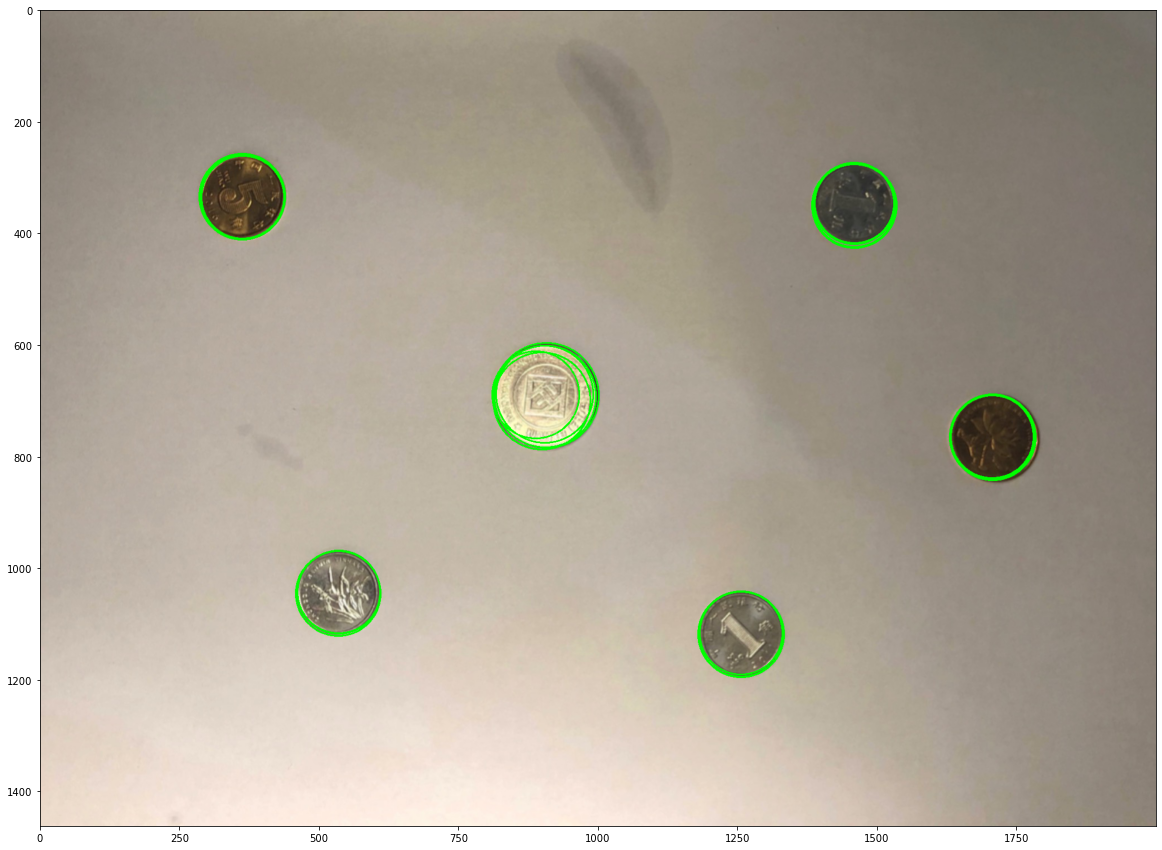

[(362, 334),
 75,
 (1459, 346),
 71,
 (905, 692),
 91,
 (1707, 765),
 75,
 (534, 1045),
 76,
 (1256, 1118),
 76]

In [28]:
utils.visualize(res)
plist